### Практическое задание. Урок 2.

#### 1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 0, coef = True, random_state = 2)

In [3]:
# Получим средние значения и стандартное отклонение по столбцам
 
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [5]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [6]:
# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.05
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 12.674


In [7]:
# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors2 = []
 
# шаг градиентного спуска
eta = 0.05
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    # train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors2.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors2[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 12.673


Text(0, 0.5, 'MSE')

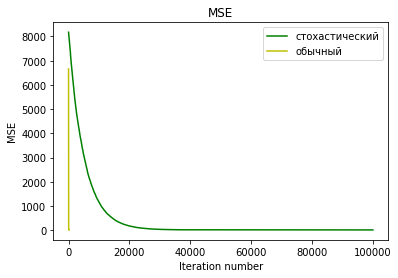

In [8]:
# Визуализируем изменение функционала ошибки
plt.plot(errors, color='g', label='стохастический')
plt.plot(errors2, color='y', label='обычный')
plt.title('MSE')
plt.legend(loc='best')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

### Вывод:
Скорость сходимости обычного градиентного спуска по сравнению со скоростью схождения стохастического градиентного спуска существенно выше.

#### 2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [9]:
# реализуем функцию, определяющую среднеквадратичную ошибку c L2 регуляризацией
def mserror_L2(X, w, y_pred, l2):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y) + l2*sum(w**2)

In [10]:
# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_L2 = []
 
# шаг градиентного спуска
eta = 0.05
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)

# Коэффициент L2 регуляризации
l2 = 0.1
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_L2.append(mserror_L2(data, new_w, target, l2))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_L2[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 849.5854


In [11]:
# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors2_L2 = []
 
# шаг градиентного спуска
eta = 0.05
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)

# Коэффициент L2 регуляризации
l2 = 0.1
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    # train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors2_L2.append(mserror_L2(data, new_w, target, l2))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors2_L2[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 849.0257


Text(0, 0.5, 'MSE')

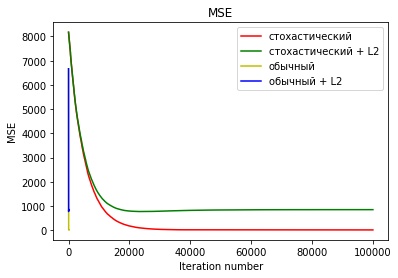

In [12]:
# Визуализируем изменение функционала ошибки
plt.plot(errors, color='r', label='стохастический')
plt.plot(errors_L2, color='g', label='стохастический + L2')
plt.plot(errors2, color='y', label='обычный')
plt.plot(errors2_L2, color='b', label='обычный + L2')
plt.title('MSE')
plt.legend(loc='best')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

### Вывод:
Применение L2 регуляризации не повлияла на скорость сходимости обычного и стохастического градиентного спуска.